In [1]:
import tensorflow as tf
from tensorflow import keras
import pathlib
import matplotlib.pyplot as plt
import cv2
import PIL
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_set_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
dataset=keras.utils.get_file("flower_photos",origin=data_set_url,untar=True,cache_dir=".")

In [4]:
dataset_windows_path=pathlib.Path(dataset)

In [5]:
list(dataset_windows_path.glob("*/*"))[:5]

[PosixPath('datasets/flower_photos/daisy/4657354814_f368762c53_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/799952628_bf836677fa_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/18711159980_11d3bd5042.jpg'),
 PosixPath('datasets/flower_photos/daisy/9922116524_ab4a2533fe_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14088053307_1a13a0bf91_n.jpg')]

In [6]:
roses_iamges=list(dataset_windows_path.glob("roses/*"))
tulips_iamges=list(dataset_windows_path.glob("tulips/*"))

In [7]:
roses_iamges[0]

PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg')

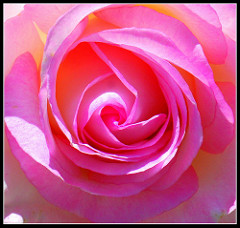

In [8]:
PIL.Image.open(roses_iamges[0])

array([[[ 4,  1,  0],
        [ 7,  2,  3],
        [ 4,  0,  3],
        ...,
        [ 2,  0,  7],
        [17,  6,  2],
        [ 4,  0,  0]],

       [[ 0,  1,  0],
        [ 7,  7,  7],
        [ 0,  0,  1],
        ...,
        [ 0,  0,  6],
        [12,  5,  2],
        [ 0,  0,  1]],

       [[ 0,  0,  0],
        [ 0,  2,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  3],
        [ 9,  4,  3],
        [ 0,  0,  1]],

       ...,

       [[ 3,  3,  3],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 1,  1,  1],
        [ 3,  3,  3],
        ...,
        [ 4,  4,  4],
        [ 2,  2,  2],
        [ 0,  0,  0]]], dtype=uint8)
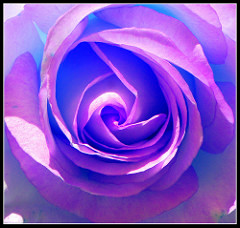

In [9]:
cv2.imread(str(roses_iamges[0]))

In [10]:
flowers_images_dict = {
    'roses': list(dataset_windows_path.glob('roses/*')),
    'daisy': list(dataset_windows_path.glob('daisy/*')),
    'dandelion': list(dataset_windows_path.glob('dandelion/*')),
    'sunflowers': list(dataset_windows_path.glob('sunflowers/*')),
    'tulips': list(dataset_windows_path.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
x,y=[],[]
for image_names,image_path in flowers_images_dict.items():
  for image in image_path:
    img=cv2.imread(str(image))
    img=cv2.resize(img,(128,128))
    x.append(img)
    y.append(flowers_labels_dict[image_names])


In [13]:
x=np.array(x)
y=np.array(y)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [15]:
X_train.shape

(2752, 128, 128, 3)

In [16]:
X_test.shape

(918, 128, 128, 3)

In [17]:
model=keras.models.Sequential([
    keras.layers.experimental.preprocessing.Resizing(128,128),
    keras.layers.experimental.preprocessing.Rescaling(1.0/255.0),

    #Data Augmentation layer
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomZoom(0.5),
    keras.layers.experimental.preprocessing.RandomRotation(0.4),

    #CNN Layer
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(180,180,3)),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D((2,2)),

    #Dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(5,activation="softmax"),

])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [18]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
86/86 [==============================] - 42s 461ms/step - loss: 1.3676 - accuracy: 0.3928
Epoch 2/20
86/86 [==============================] - 40s 470ms/step - loss: 1.1981 - accuracy: 0.4840
Epoch 3/20
86/86 [==============================] - 38s 439ms/step - loss: 1.0989 - accuracy: 0.5607
Epoch 4/20
86/86 [==============================] - 37s 436ms/step - loss: 1.0625 - accuracy: 0.5694
Epoch 5/20
86/86 [==============================] - 39s 451ms/step - loss: 0.9799 - accuracy: 0.6141
Epoch 6/20
86/86 [==============================] - 39s 450ms/step - loss: 0.9462 - accuracy: 0.6199
Epoch 7/20
86/86 [==============================] - 41s 475ms/step - loss: 0.8972 - accuracy: 0.6461
Epoch 8/20
86/86 [==============================] - 38s 437ms/step - loss: 0.9214 - accuracy: 0.6399
Epoch 9/20
86/86 [==============================] - 38s 442ms/step - loss: 0.8925 - accuracy: 0.6501
Epoch 10/20
86/86 [==============================] - 38s 446ms/step - loss: 0.8578 - accura

In [20]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 5s 150ms/step - loss: 0.8852 - accuracy: 0.6667


[0.8852487802505493, 0.6666666865348816]

In [21]:
y_pred=[np.argmax(i) for i in model.predict(X_test)]

29/29 [==============================] - 4s 124ms/step


In [25]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       181
           1       0.63      0.78      0.70       159
           2       0.88      0.57      0.70       221
           3       0.65      0.91      0.76       170
           4       0.61      0.52      0.56       187

    accuracy                           0.67       918
   macro avg       0.68      0.68      0.66       918
weighted avg       0.69      0.67      0.66       918



<Axes: >

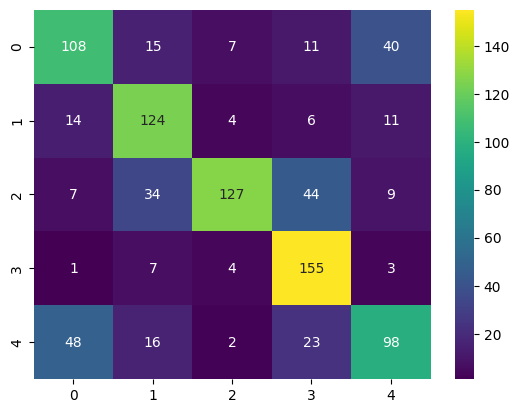

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True,cmap="viridis")

In [41]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [45]:
list(flowers_labels_dict.keys())[list(flowers_labels_dict.values()).index(2)]

'dandelion'

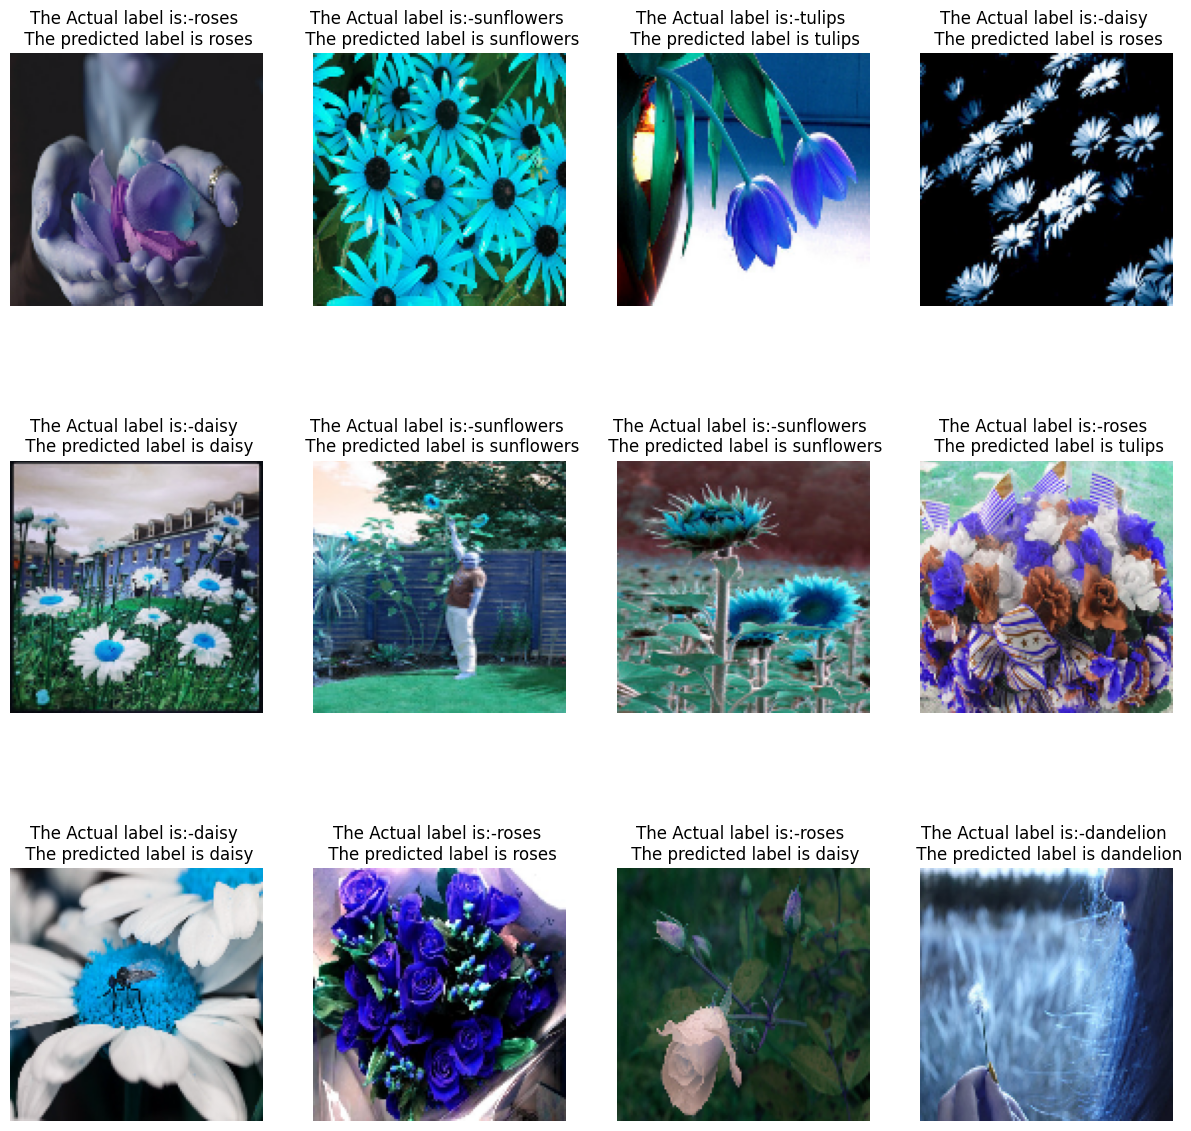

In [63]:
plt.figure(figsize=(15,15))
for i in range(12):
  ax=plt.subplot(3,4,i+1)
  plt.title(f"The Actual label is:-{list(flowers_labels_dict.keys())[list(flowers_labels_dict.values()).index(y_test[i])]} \n The predicted label is {list(flowers_labels_dict.keys())[list(flowers_labels_dict.values()).index(y_pred[i])]}")
  plt.imshow(X_test[i])
  plt.axis("off")